In [1]:
from tensorflow.keras.layers import Input, Dense, Embedding, Dot, Flatten, Concatenate, concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal

from tensorflow.keras import backend as K
import tensorflow as tf

import numpy as np




In [36]:
# we'll pretent we're using embedding layers for our words

# just two "words" in our vocab (input hypo, input hyper)
input_hypo_seq = [[1]]
input_hyper_seq = [[2]]

embedding_matrix = np.zeros((3,3))
input_a = np.array([[0.1, -0.5, 0.4]])
input_b = np.array([[0.3, 0.2, 0.1]])
embedding_matrix[1] = input_a
embedding_matrix[2] = input_b

embedding_matrix


array([[ 0. ,  0. ,  0. ],
       [ 0.1, -0.5,  0.4],
       [ 0.3,  0.2,  0.1]])

In [115]:
def build_model():

    hypo_input = Input(shape=(1,), name='Hyponym')
    hyper_input = Input(shape=(1,), name='Hypernym')

    word_embedding = Embedding(3, 3, name='WordEmbedding')
    
    
    hypo_embedding = word_embedding(hypo_input)
    hyper_embedding = word_embedding(hyper_input)

    # this one is custom and is based on the CRIM paper. 
    # we initialise on random normal noise applied to an identity matrix
    def random_identity(shape, dtype="float32", partition_info=None):    
        identity = K.eye(shape[-1], dtype='float32')

        return identity 

    def random_identity_2(shape, dtype="float32", partition_info=None):    
        identity = K.eye(shape[-1], dtype='float32')

        return identity * 0.5

    phi0 = Dense(3, activation=None, use_bias=False, 
                kernel_initializer=random_identity, name='Phi0')(hypo_embedding)

    phi1 = Dense(3, activation=None, use_bias=False, 
                kernel_initializer=random_identity_2, name='Phi1')(hypo_embedding)

    phi = concatenate([phi0, phi1], axis=1)

    phi_hyper = Dot(axes=-1, normalize=False, name='DotProduct')([phi, hyper_embedding])
    phi_hyper = Flatten()(phi_hyper)

    predictions = Dense(1, activation="sigmoid", name='Prediction')(phi_hyper)

    model_test = Model(inputs=[hypo_input, hyper_input], outputs=predictions)
    model_test.get_layer(name='WordEmbedding').set_weights([embedding_matrix])
    model_test.get_layer(name='WordEmbedding').trainable = False

    model_test.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model_test




In [116]:
model_test = build_model()
model_test.summary()
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

plot_model(model_test, to_file='model_test.png', show_shapes=True, show_layer_names=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Hyponym (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
WordEmbedding (Embedding)       (None, 1, 3)         9           Hyponym[0][0]                    
                                                                 Hypernym[0][0]                   
__________________________________________________________________________________________________
Phi0 (Dense)                    (None, 1, 3)         9           WordEmbedding[0][0]              
__________________________________________________________________________________________________
Phi1 (Dense)                    (None, 1, 3)         9           WordEmbedding[0][0]              
__________

In [110]:
#model_test = build_model()
model_test.fit([input_hypo_seq, input_hyper_seq], [1], epochs=1000)


Epoch 1/1000
1/1 [==============================] - 1s 529ms/step - loss: 0.7082 - acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7054 - acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7033 - acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7016 - acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7001 - acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6987 - acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6974 - acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6962 - acc: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6950 - acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6939 - acc: 0.0000e+00
Epoch 11/1000
1/1 [========

Epoch 88/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6255 - acc: 1.0000
Epoch 89/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6246 - acc: 1.0000
Epoch 90/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6237 - acc: 1.0000
Epoch 91/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6229 - acc: 1.0000
Epoch 92/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6220 - acc: 1.0000
Epoch 93/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6211 - acc: 1.0000
Epoch 94/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6202 - acc: 1.0000
Epoch 95/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6194 - acc: 1.0000
Epoch 96/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6185 - acc: 1.0000
Epoch 97/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6176 - acc: 1.0000
Epoch 98/1000
1/1 [==============================] - 0s 5ms/

Epoch 175/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5491 - acc: 1.0000
Epoch 176/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5482 - acc: 1.0000
Epoch 177/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5474 - acc: 1.0000
Epoch 178/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5465 - acc: 1.0000
Epoch 179/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5456 - acc: 1.0000
Epoch 180/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5447 - acc: 1.0000
Epoch 181/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5438 - acc: 1.0000
Epoch 182/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5430 - acc: 1.0000
Epoch 183/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5421 - acc: 1.0000
Epoch 184/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5412 - acc: 1.0000
Epoch 185/1000
1/1 [==============================

Epoch 262/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4731 - acc: 1.0000
Epoch 263/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4723 - acc: 1.0000
Epoch 264/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4714 - acc: 1.0000
Epoch 265/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4705 - acc: 1.0000
Epoch 266/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4697 - acc: 1.0000
Epoch 267/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4688 - acc: 1.0000
Epoch 268/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4680 - acc: 1.0000
Epoch 269/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.4671 - acc: 1.0000
Epoch 270/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4662 - acc: 1.0000
Epoch 271/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4654 - acc: 1.0000
Epoch 272/1000
1/1 [==============================

Epoch 349/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3997 - acc: 1.0000
Epoch 350/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3989 - acc: 1.0000
Epoch 351/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3981 - acc: 1.0000
Epoch 352/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3973 - acc: 1.0000
Epoch 353/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3965 - acc: 1.0000
Epoch 354/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3956 - acc: 1.0000
Epoch 355/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3948 - acc: 1.0000
Epoch 356/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3940 - acc: 1.0000
Epoch 357/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3932 - acc: 1.0000
Epoch 358/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.3924 - acc: 1.0000
Epoch 359/1000
1/1 [==============================

Epoch 436/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3309 - acc: 1.0000
Epoch 437/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3302 - acc: 1.0000
Epoch 438/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3294 - acc: 1.0000
Epoch 439/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3287 - acc: 1.0000
Epoch 440/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3279 - acc: 1.0000
Epoch 441/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3272 - acc: 1.0000
Epoch 442/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3264 - acc: 1.0000
Epoch 443/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3256 - acc: 1.0000
Epoch 444/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3249 - acc: 1.0000
Epoch 445/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3241 - acc: 1.0000
Epoch 446/1000
1/1 [=============================

Epoch 523/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2683 - acc: 1.0000
Epoch 524/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2676 - acc: 1.0000
Epoch 525/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2670 - acc: 1.0000
Epoch 526/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2663 - acc: 1.0000
Epoch 527/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2656 - acc: 1.0000
Epoch 528/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2649 - acc: 1.0000
Epoch 529/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2643 - acc: 1.0000
Epoch 530/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2636 - acc: 1.0000
Epoch 531/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2629 - acc: 1.0000
Epoch 532/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2622 - acc: 1.0000
Epoch 533/1000
1/1 [==============================

Epoch 610/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2130 - acc: 1.0000
Epoch 611/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2124 - acc: 1.0000
Epoch 612/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2118 - acc: 1.0000
Epoch 613/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2112 - acc: 1.0000
Epoch 614/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2106 - acc: 1.0000
Epoch 615/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2101 - acc: 1.0000
Epoch 616/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2095 - acc: 1.0000
Epoch 617/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2089 - acc: 1.0000
Epoch 618/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2083 - acc: 1.0000
Epoch 619/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2077 - acc: 1.0000
Epoch 620/1000
1/1 [==============================

Epoch 697/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1655 - acc: 1.0000
Epoch 698/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1650 - acc: 1.0000
Epoch 699/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1646 - acc: 1.0000
Epoch 700/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1641 - acc: 1.0000
Epoch 701/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1636 - acc: 1.0000
Epoch 702/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1631 - acc: 1.0000
Epoch 703/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1626 - acc: 1.0000
Epoch 704/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1621 - acc: 1.0000
Epoch 705/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1616 - acc: 1.0000
Epoch 706/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1611 - acc: 1.0000
Epoch 707/1000
1/1 [==============================

Epoch 784/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1260 - acc: 1.0000
Epoch 785/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1256 - acc: 1.0000
Epoch 786/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1252 - acc: 1.0000
Epoch 787/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1248 - acc: 1.0000
Epoch 788/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1244 - acc: 1.0000
Epoch 789/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1240 - acc: 1.0000
Epoch 790/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1236 - acc: 1.0000
Epoch 791/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1232 - acc: 1.0000
Epoch 792/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1228 - acc: 1.0000
Epoch 793/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1224 - acc: 1.0000
Epoch 794/1000
1/1 [==============================

Epoch 871/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0940 - acc: 1.0000
Epoch 872/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0936 - acc: 1.0000
Epoch 873/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0933 - acc: 1.0000
Epoch 874/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0930 - acc: 1.0000
Epoch 875/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0927 - acc: 1.0000
Epoch 876/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0923 - acc: 1.0000
Epoch 877/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0920 - acc: 1.0000
Epoch 878/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0917 - acc: 1.0000
Epoch 879/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0914 - acc: 1.0000
Epoch 880/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0910 - acc: 1.0000
Epoch 881/1000
1/1 [==============================

Epoch 958/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0687 - acc: 1.0000
Epoch 959/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0684 - acc: 1.0000
Epoch 960/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0682 - acc: 1.0000
Epoch 961/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0679 - acc: 1.0000
Epoch 962/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0677 - acc: 1.0000
Epoch 963/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0674 - acc: 1.0000
Epoch 964/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0672 - acc: 1.0000
Epoch 965/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0669 - acc: 1.0000
Epoch 966/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0667 - acc: 1.0000
Epoch 967/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0664 - acc: 1.0000
Epoch 968/1000
1/1 [==============================

In [111]:
print model_test.predict([input_hypo_seq, input_hyper_seq])

model_test.get_layer(name='Prediction').get_weights()

[[0.94326264]]


[array([[1.6896176],
        [1.4729645]], dtype=float32), array([0.9895472], dtype=float32)]

In [112]:
# simulate forward pass when predicting
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

features = model_test.get_layer(name='Prediction').get_weights()[0]
bias = model_test.get_layer(name='Prediction').get_weights()[1]

print "Weights:"
print features[0], features[1], bias
print "-"*30
proj1 = model_test.get_layer(name='Phi0').get_weights()[0]
proj2 = model_test.get_layer(name='Phi1').get_weights()[0]
print "Learnt projections:"
print proj1
print proj2
print "-"*30
P1 = np.dot(input_a, proj1)
P2 = np.dot(input_a, proj2)

P = np.concatenate((P1,P2), axis = 0)
s = np.dot(P, input_b.T)
print s 
pred = np.sum(s.flatten() * features.flatten()) + bias

sigmoid(pred)

Weights:
[1.6896176] [1.4729645] [0.9895472]
------------------------------
Learnt projections:
[[ 1.9969629   0.9969551   0.99693394]
 [-0.9969742   0.00302791 -0.9969679 ]
 [ 0.99697304  0.99697095  1.9969668 ]]
[[ 1.4996156   0.99960643  0.9995799 ]
 [-0.9996293  -0.4996276  -0.9996222 ]
 [ 0.9996283   0.9996262   1.4996198 ]]
------------------------------
[[0.56818217]
 [0.58477495]]


0.943262565308684

# Original Yamane POC

In [158]:
def get_embeddings_model(dim, embedding_matrix):
    hypo_input = Input(shape=(1,))
    hyper_input = Input(shape=(1,))

    word_embedding = Embedding(embedding_matrix.shape[0], dim, name='WE')

    hypo_embedding = word_embedding(hypo_input)
    hyper_embedding = word_embedding(hyper_input)

    embedding_model = Model(inputs=[hypo_input, hyper_input], outputs=[hypo_embedding, hyper_embedding])

    # inject pre-trained embeddings into this mini, resusable model/layer
    embedding_model.get_layer(name='WE').set_weights([embedding_matrix])
    embedding_model.get_layer(name='WE').trainable = False
    return embedding_model

In [159]:
hypo_input = Input(shape=(1,))
hyper_input = Input(shape=(1,))

# create model that reuse weights of another model
# our model_test is not an actual model but a pre-trained
# embeddings layer
# this allows us to reuse the same embedding weights for every 
# cluster we need to create model.
# less resources are therefore consumed to build and train the 
# Yamane model

# employ model as a "layer"
embedding_layer = get_embeddings_model(3, embedding_matrix)
e1, e2 = embedding_layer([hypo_input, hyper_input])
hypo_flat = Flatten()(e1)
hyper_flat = Flatten()(e2)

model2 = Model([hypo_input, hyper_input], outputs=[hypo_flat, hyper_flat])


In [160]:
print model2.predict([input_hypo_seq, input_hyper_seq])[1]

[[0.3 0.2 0.1]]


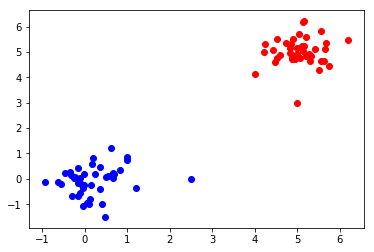

In [423]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)
# hyponym cluster #1 simulation
#X1 = np.random.normal(-0.005,0.001,size=(4,2)) 
X1 = np.random.normal(5,0.5,size=(40,2)) 
# hypernym for cluster #1
Y1 = np.array([[5., 3.]])

# hyponym cluster #2 simulation
X2 = np.random.normal(0,0.5,size=(40,2)) 
#X2[:,1] +=  0.01
Y2 = np.array([[2.5, 0.010]])

plt.figure()
plt.scatter(X1[:,0], X1[:,1],c='red')
plt.scatter(Y1[:,0], Y1[:,1],c='red')
plt.scatter(X2[:,0], X2[:,1],c='blue')
plt.scatter(Y2[:,0], Y2[:,1],c='blue')



In [455]:
# create embedding matrix from synthesised samples
X = np.vstack((X1, X2))
Y = np.vstack((Y1, Y2))

hyponym_size = X.shape[0]
hypernym_size = Y.shape[0]
dim = 2

vocab_size = hyponym_size + hypernym_size
embedding_matrix = np.zeros((vocab_size + 1, dim))


embedding_matrix[1:len(X)+1,:] = X
embedding_matrix[len(X)+1:,:] = Y


In [456]:
for vector in embedding_matrix:
    vector /= np.linalg.norm(vector)

embedding_matrix[0] = [0., 0.]

In [470]:
embedding_matrix

array([[ 0.        ,  0.        ],
       [ 0.72658971,  0.68707161],
       [ 0.64594915,  0.76338044],
       [ 0.75305978,  0.6579521 ],
       [ 0.71253323,  0.70163836],
       [ 0.71345684,  0.70069917],
       [ 0.68150992,  0.73180887],
       [ 0.63373349,  0.77355146],
       [ 0.69966319,  0.71447283],
       [ 0.65830069,  0.75275507],
       [ 0.78975937,  0.61341678],
       [ 0.69685485,  0.71721219],
       [ 0.63817414,  0.76989205],
       [ 0.6898798 ,  0.72392393],
       [ 0.66317437,  0.74846493],
       [ 0.67572393,  0.73715478],
       [ 0.7174236 ,  0.69663719],
       [ 0.72865953,  0.68487611],
       [ 0.74272604,  0.66959542],
       [ 0.7326168 ,  0.68064134],
       [ 0.77199773,  0.63562529],
       [ 0.74139194,  0.67107227],
       [ 0.68976664,  0.72403175],
       [ 0.68472595,  0.72880064],
       [ 0.68368498,  0.72977726],
       [ 0.73133936,  0.68201374],
       [ 0.69603042,  0.71801229],
       [ 0.66208366,  0.74942993],
       [ 0.72822902,

In [430]:
# create sequence input data
X_hyponym = X
Y_hypernym = np.vstack((np.tile(Y[0,:], (40,1)), np.tile(Y[1,:], (40,1))))

X_hyponym_seq = []
Y_hypernym_seq = []
for i in range(X_hyponym.shape[0]):
    X_hyponym_seq.append([np.argwhere(embedding_matrix == X_hyponym[i])[0,0]])
    Y_hypernym_seq.append([np.argwhere(embedding_matrix == Y_hypernym[i])[0,0]])

# all samples are positive
y_label = [1] * len(X_hyponym_seq) 

### Function that creates cluster model

In [482]:
from tensorflow.keras.layers import Input, Dense, Embedding, Dot, Flatten, Concatenate, concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import backend as K

import tensorflow as tf

def get_new_cluster_model(embedding_layer, phi_dim):
    hypo_input = Input(shape=(1,), name='Hyponym')    
    hyper_input = Input(shape=(1,), name='Hypernym')
    
    hypo_embedding, hyper_embedding = embedding_layer([hypo_input, hyper_input])
    
    def random_identity(shape, dtype="float32", partition_info=None):    
        identity = K.eye(shape[-1], dtype='float32')
    
        rnorm = K.random_normal((shape[-1],shape[-1]), 
                             mean=0., stddev=1.)

        return identity * rnorm

    phi = Dense(phi_dim, activation=None, use_bias=False, 
                kernel_initializer="random_normal", name='Phi')(hypo_embedding)
    
    # flatten phi and hyper_embedding tensors
    phi = Flatten()(phi)
    hyper_embedding = Flatten()(hyper_embedding)
    
    phi_hyper = Dot(axes=-1, normalize=False, name='DotProduct')([phi, hyper_embedding])
    
    predictions = Dense(1, activation="sigmoid", kernel_regularizer=l1(0.001), bias_regularizer=l1(0.001), name='Prediction')(phi_hyper)
    # instantiate model
    model = Model(inputs=[hypo_input, hyper_input], outputs=predictions)
    
    # compile using binary_crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [461]:
# get instance of embedding model which we will inject into every new 
# cluster model.  No sense into having individual embedding layers since
# embedding layers are not trainable in this model
embedding_layer = get_embeddings_model(dim=2, embedding_matrix=embedding_matrix)



In [317]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Hyponym (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
Hypernym (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
model_36 (Model)                [(None, 1, 2), (None 22          Hyponym[0][0]                    
                                                                 Hypernym[0][0]                   
__________________________________________________________________________________________________
Phi (Dense)                     (None, 1, 2)         4           model_36[1][0]                   
__________

### Yamane learning algorithm

In [483]:
X_hyponym_seq = np.array(X_hyponym_seq, dtype='int32')
Y_hypernym_seq = np.array(Y_hypernym_seq, dtype='int32')
y_label = np.array(y_label, dtype='int32')

# all samples initialised to 1
sample_clusters = np.ones(len(X_hyponym_seq), dtype='int32')

# list of clusters
clusters = []
clusters.append(get_new_cluster_model(embedding_layer, phi_dim=2))
# initialise all samples to cluster 1

indices = np.arange(len(X_hyponym_seq))
np.random.seed(42)
# shuffle training set
np.random.shuffle(indices)
# simple structure that records cluster id for every sample
sample_clusters[indices] = 0


In [484]:
losses = [0.]
epochs = 50
threshold = 0.4
# indicator of "current" sample cluster index
z_i = 0

# iterate over samples
for epoch in range(epochs):
    print "Epoch ======> %d" % (epoch)
    # reset losses to zero
    losses = [0. for _ in losses]
    # train algorithm by stochastic gradient descent, one sample at a time
    for i in indices:
        print "Doing", i, X_hyponym_seq[i], Y_hypernym_seq[i], sample_clusters[i]
        # find number of clusters
        sim = map(lambda x: x.predict([X_hyponym_seq[i], Y_hypernym_seq[i]]), clusters)
        max_sim = np.argmax(sim)
        print "Max Similarity cluster:", max_sim, "(sim = %0.8f)" % (sim[max_sim])
        if sim[max_sim] < threshold:                        
            # add new cluster to list of clusters
            clusters.append(get_new_cluster_model(embedding_layer, phi_dim=2))
            losses.append(0.)
            # assign current cluster index to latest model
            z_i = len(clusters) - 1
            sample_clusters[i] = z_i
        else:            
            z_i = max_sim
            sample_clusters[i] = z_i
                
        # get indices of elements belonging to cluster
        z_i_indices = np.argwhere(sample_clusters == z_i).flatten()        
        # shuffle batch indices
        np.random.shuffle(z_i_indices)
        # update parameters of cluster 
        losses[z_i] += clusters[z_i].train_on_batch([X_hyponym_seq[z_i_indices], Y_hypernym_seq[z_i_indices]], y_label[z_i_indices])[0]
        print "Loss on cluster", z_i, losses[z_i]
        



Epoch ======> 0
Doing 30 [31] [81] 0
Max Similarity cluster: 0 (sim = 0.51637596)
Loss on cluster 0 0.678040623664856
Doing 0 [1] [81] 0
Max Similarity cluster: 0 (sim = 0.51728499)
Loss on cluster 0 1.3550586104393005
Doing 22 [23] [81] 0
Max Similarity cluster: 0 (sim = 0.51771861)
Loss on cluster 0 2.0310547947883606
Doing 31 [32] [81] 0
Max Similarity cluster: 0 (sim = 0.51926899)
Loss on cluster 0 2.706029772758484
Doing 18 [19] [81] 0
Max Similarity cluster: 0 (sim = 0.51980966)
Loss on cluster 0 3.3799845576286316
Doing 28 [29] [81] 0
Max Similarity cluster: 0 (sim = 0.52078402)
Loss on cluster 0 4.052919983863831
Doing 10 [11] [81] 0
Max Similarity cluster: 0 (sim = 0.52113622)
Loss on cluster 0 4.724836885929108
Doing 70 [71] [82] 0
Max Similarity cluster: 0 (sim = 0.49181044)
Loss on cluster 0 5.3957359790802
Doing 4 [5] [81] 0
Max Similarity cluster: 0 (sim = 0.52294719)
Loss on cluster 0 6.065618336200714
Doing 12 [13] [81] 0
Max Similarity cluster: 0 (sim = 0.52355248)
Los

Max Similarity cluster: 0 (sim = 0.61140156)
Loss on cluster 0 19.309699714183807
Doing 50 [51] [82] 0
Max Similarity cluster: 0 (sim = 0.49138901)
Loss on cluster 0 19.879684150218964
Doing 53 [54] [82] 0
Max Similarity cluster: 0 (sim = 0.54753155)
Loss on cluster 0 20.44879651069641
Doing 19 [20] [81] 0
Max Similarity cluster: 0 (sim = 0.61436439)
Loss on cluster 0 21.017038583755493
Doing 66 [67] [82] 0
Max Similarity cluster: 0 (sim = 0.49689835)
Loss on cluster 0 21.584412038326263
Doing 25 [26] [81] 0
Max Similarity cluster: 0 (sim = 0.61564076)
Loss on cluster 0 22.150918662548065
Doing 44 [45] [82] 0
Max Similarity cluster: 0 (sim = 0.49380773)
Loss on cluster 0 22.716560184955597
Doing 13 [14] [81] 0
Max Similarity cluster: 0 (sim = 0.61687809)
Loss on cluster 0 23.28133851289749
Doing 76 [77] [82] 0
Max Similarity cluster: 0 (sim = 0.59534711)
Loss on cluster 0 23.845255196094513
Doing 3 [4] [81] 0
Max Similarity cluster: 0 (sim = 0.61923754)
Loss on cluster 0 24.40831202268

Loss on cluster 0 33.93257254362106
Doing 37 [38] [81] 0
Max Similarity cluster: 0 (sim = 0.70359737)
Loss on cluster 0 34.41529017686844
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.70585597)
Loss on cluster 0 34.8973551094532
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (sim = 0.70530862)
Loss on cluster 0 35.378769278526306
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.44928348)
Loss on cluster 0 35.85953468084335
Doing 21 [22] [81] 0
Max Similarity cluster: 0 (sim = 0.70773041)
Loss on cluster 0 36.339653223752975
Doing 2 [3] [81] 0
Max Similarity cluster: 0 (sim = 0.70898759)
Loss on cluster 0 36.81912684440613
Doing 23 [24] [81] 0
Max Similarity cluster: 0 (sim = 0.70909810)
Loss on cluster 0 37.29795756936073
Doing 74 [75] [82] 0
Max Similarity cluster: 0 (sim = 0.65256977)
Loss on cluster 0 37.776147186756134
Doing 20 [21] [81] 0
Max Similarity cluster: 0 (sim = 0.71118349)
Loss on cluster 0 38.2536977827549
Doing 60 [61] [82] 0
Max Similarity cluster: 0 (s

Max Similarity cluster: 0 (sim = 0.69834095)
Loss on cluster 0 6.3982206881046295
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.71296936)
Loss on cluster 0 6.820978879928589
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.41859153)
Loss on cluster 0 7.243271619081497
Doing 61 [62] [82] 0
Max Similarity cluster: 0 (sim = 0.71465951)
Loss on cluster 0 7.6651003658771515
Doing 55 [56] [82] 0
Max Similarity cluster: 0 (sim = 0.55803233)
Loss on cluster 0 8.086466491222382
Doing 40 [41] [82] 0
Max Similarity cluster: 0 (sim = 0.72816545)
Loss on cluster 0 8.507371455430984
Doing 9 [10] [81] 0
Max Similarity cluster: 0 (sim = 0.77829748)
Loss on cluster 0 8.927816718816757
Doing 64 [65] [82] 0
Max Similarity cluster: 0 (sim = 0.72384024)
Loss on cluster 0 9.34780365228653
Doing 5 [6] [81] 0
Max Similarity cluster: 0 (sim = 0.77879179)
Loss on cluster 0 9.767333656549454
Doing 47 [48] [82] 0
Max Similarity cluster: 0 (sim = 0.72614634)
Loss on cluster 0 10.186408132314682
Do

Max Similarity cluster: 0 (sim = 0.76104414)
Loss on cluster 0 15.89845871925354
Doing 3 [4] [81] 0
Max Similarity cluster: 0 (sim = 0.82458103)
Loss on cluster 0 16.278670132160187
Doing 17 [18] [81] 0
Max Similarity cluster: 0 (sim = 0.82535851)
Loss on cluster 0 16.658534169197083
Doing 38 [39] [81] 0
Max Similarity cluster: 0 (sim = 0.82262391)
Loss on cluster 0 17.03805160522461
Doing 8 [9] [81] 0
Max Similarity cluster: 0 (sim = 0.82428139)
Loss on cluster 0 17.41722333431244
Doing 65 [66] [82] 0
Max Similarity cluster: 0 (sim = 0.44937918)
Loss on cluster 0 17.79605010151863
Doing 6 [7] [81] 0
Max Similarity cluster: 0 (sim = 0.82411140)
Loss on cluster 0 18.17453271150589
Doing 36 [37] [81] 0
Max Similarity cluster: 0 (sim = 0.82560855)
Loss on cluster 0 18.552671998739243
Doing 72 [73] [82] 0
Max Similarity cluster: 0 (sim = 0.73312944)
Loss on cluster 0 18.93046870827675
Doing 58 [59] [82] 0
Max Similarity cluster: 0 (sim = 0.48068634)
Loss on cluster 0 19.30792361497879
Doin

Loss on cluster 0 22.186298221349716
Doing 32 [33] [81] 0
Max Similarity cluster: 0 (sim = 0.85643840)
Loss on cluster 0 22.53480225801468
Doing 75 [76] [82] 0
Max Similarity cluster: 0 (sim = 0.79232359)
Loss on cluster 0 22.883020132780075
Doing 59 [60] [82] 0
Max Similarity cluster: 0 (sim = 0.52861804)
Loss on cluster 0 23.230952262878418
Doing 63 [64] [82] 0
Max Similarity cluster: 0 (sim = 0.78037506)
Loss on cluster 0 23.578599095344543
Doing 69 [70] [82] 0
Max Similarity cluster: 0 (sim = 0.79342306)
Loss on cluster 0 23.925961077213287
Doing 37 [38] [81] 0
Max Similarity cluster: 0 (sim = 0.85495543)
Loss on cluster 0 24.273038655519485
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.85781378)
Loss on cluster 0 24.61983221769333
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (sim = 0.85581040)
Loss on cluster 0 24.966342240571976
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.44340307)
Loss on cluster 0 25.312569081783295
Doing 21 [22] [81] 0
Max Similarity clus

Max Similarity cluster: 0 (sim = 0.87303108)
Loss on cluster 0 23.386418640613556
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.46029270)
Loss on cluster 0 23.711192220449448
Doing 21 [22] [81] 0
Max Similarity cluster: 0 (sim = 0.87510037)
Loss on cluster 0 24.035710781812668
Doing 2 [3] [81] 0
Max Similarity cluster: 0 (sim = 0.87683946)
Loss on cluster 0 24.359974563121796
Doing 23 [24] [81] 0
Max Similarity cluster: 0 (sim = 0.87526619)
Loss on cluster 0 24.683983892202377
Doing 74 [75] [82] 0
Max Similarity cluster: 0 (sim = 0.76752585)
Loss on cluster 0 25.007739037275314
Doing 20 [21] [81] 0
Max Similarity cluster: 0 (sim = 0.87720704)
Loss on cluster 0 25.331240326166153
Doing 60 [61] [82] 0
Max Similarity cluster: 0 (sim = 0.45309645)
Loss on cluster 0 25.65448796749115
Doing 71 [72] [82] 0
Max Similarity cluster: 0 (sim = 0.50235224)
Loss on cluster 0 25.97748225927353
Doing 14 [15] [81] 0
Max Similarity cluster: 0 (sim = 0.87590128)
Loss on cluster 0 26.30022352933

Max Similarity cluster: 0 (sim = 0.89356208)
Loss on cluster 0 3.619010955095291
Doing 67 [68] [82] 0
Max Similarity cluster: 0 (sim = 0.43680170)
Loss on cluster 0 3.9190929532051086
Doing 35 [36] [81] 0
Max Similarity cluster: 0 (sim = 0.89199877)
Loss on cluster 0 4.2189449071884155
Doing 68 [69] [82] 0
Max Similarity cluster: 0 (sim = 0.80608070)
Loss on cluster 0 4.518566936254501
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.81537783)
Loss on cluster 0 4.817959308624268
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.43035877)
Loss on cluster 0 5.117122232913971
Doing 61 [62] [82] 0
Max Similarity cluster: 0 (sim = 0.79172671)
Loss on cluster 0 5.416055887937546
Doing 55 [56] [82] 0
Max Similarity cluster: 0 (sim = 0.66761100)
Loss on cluster 0 5.714760512113571
Doing 40 [41] [82] 0
Max Similarity cluster: 0 (sim = 0.81545132)
Loss on cluster 0 6.0132362842559814
Doing 9 [10] [81] 0
Max Similarity cluster: 0 (sim = 0.89484298)
Loss on cluster 0 6.311483383178711

Max Similarity cluster: 0 (sim = 0.64490992)
Loss on cluster 0 9.010352909564972
Doing 7 [8] [81] 0
Max Similarity cluster: 0 (sim = 0.90430838)
Loss on cluster 0 9.288417965173721
Doing 50 [51] [82] 0
Max Similarity cluster: 0 (sim = 0.59597659)
Loss on cluster 0 9.566272407770157
Doing 53 [54] [82] 0
Max Similarity cluster: 0 (sim = 0.67694533)
Loss on cluster 0 9.843916475772858
Doing 19 [20] [81] 0
Max Similarity cluster: 0 (sim = 0.90658015)
Loss on cluster 0 10.12135037779808
Doing 66 [67] [82] 0
Max Similarity cluster: 0 (sim = 0.52629036)
Loss on cluster 0 10.398574233055115
Doing 25 [26] [81] 0
Max Similarity cluster: 0 (sim = 0.90473831)
Loss on cluster 0 10.675588250160217
Doing 44 [45] [82] 0
Max Similarity cluster: 0 (sim = 0.60704178)
Loss on cluster 0 10.952392637729645
Doing 13 [14] [81] 0
Max Similarity cluster: 0 (sim = 0.90364236)
Loss on cluster 0 11.228987514972687
Doing 76 [77] [82] 0
Max Similarity cluster: 0 (sim = 0.82747793)
Loss on cluster 0 11.50537312030792

Max Similarity cluster: 0 (sim = 0.91295099)
Loss on cluster 0 16.250109672546387
Doing 32 [33] [81] 0
Max Similarity cluster: 0 (sim = 0.91641021)
Loss on cluster 0 16.50605744123459
Doing 75 [76] [82] 0
Max Similarity cluster: 0 (sim = 0.82589489)
Loss on cluster 0 16.761813431978226
Doing 59 [60] [82] 0
Max Similarity cluster: 0 (sim = 0.65100861)
Loss on cluster 0 17.017377823591232
Doing 63 [64] [82] 0
Max Similarity cluster: 0 (sim = 0.83168137)
Loss on cluster 0 17.27275076508522
Doing 69 [70] [82] 0
Max Similarity cluster: 0 (sim = 0.82798666)
Loss on cluster 0 17.527932435274124
Doing 37 [38] [81] 0
Max Similarity cluster: 0 (sim = 0.91348583)
Loss on cluster 0 17.782922983169556
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.91674906)
Loss on cluster 0 18.03772258758545
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (sim = 0.91407531)
Loss on cluster 0 18.29233142733574
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.55918908)
Loss on cluster 0 18.5467496216297

Loss on cluster 0 15.305072888731956
Doing 32 [33] [81] 0
Max Similarity cluster: 0 (sim = 0.92357445)
Loss on cluster 0 15.546179622411728
Doing 75 [76] [82] 0
Max Similarity cluster: 0 (sim = 0.82754678)
Loss on cluster 0 15.787107154726982
Doing 59 [60] [82] 0
Max Similarity cluster: 0 (sim = 0.67315280)
Loss on cluster 0 16.027855575084686
Doing 63 [64] [82] 0
Max Similarity cluster: 0 (sim = 0.83582377)
Loss on cluster 0 16.268425077199936
Doing 69 [70] [82] 0
Max Similarity cluster: 0 (sim = 0.82979214)
Loss on cluster 0 16.50881578028202
Doing 37 [38] [81] 0
Max Similarity cluster: 0 (sim = 0.92070788)
Loss on cluster 0 16.749027863144875
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.92386436)
Loss on cluster 0 16.989061430096626
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (sim = 0.92126721)
Loss on cluster 0 17.228916689753532
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.58506155)
Loss on cluster 0 17.46859374642372
Doing 21 [22] [81] 0
Max Similarity clus

Max Similarity cluster: 0 (sim = 0.73561430)
Loss on cluster 0 2.457649528980255
Doing 33 [34] [81] 0
Max Similarity cluster: 0 (sim = 0.93369985)
Loss on cluster 0 2.68008853495121
Doing 67 [68] [82] 0
Max Similarity cluster: 0 (sim = 0.52997619)
Loss on cluster 0 2.9023642390966415
Doing 35 [36] [81] 0
Max Similarity cluster: 0 (sim = 0.93184280)
Loss on cluster 0 3.1244767010211945
Doing 68 [69] [82] 0
Max Similarity cluster: 0 (sim = 0.83798772)
Loss on cluster 0 3.3464261442422867
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.84006089)
Loss on cluster 0 3.5682126730680466
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.53216064)
Loss on cluster 0 3.7898364514112473
Doing 61 [62] [82] 0
Max Similarity cluster: 0 (sim = 0.79846883)
Loss on cluster 0 4.011297583580017
Doing 55 [56] [82] 0
Max Similarity cluster: 0 (sim = 0.75893122)
Loss on cluster 0 4.232596233487129
Doing 40 [41] [82] 0
Max Similarity cluster: 0 (sim = 0.82701695)
Loss on cluster 0 4.4537325352430

Loss on cluster 0 2.527816504240036
Doing 67 [68] [82] 0
Max Similarity cluster: 0 (sim = 0.55248940)
Loss on cluster 0 2.737474501132965
Doing 35 [36] [81] 0
Max Similarity cluster: 0 (sim = 0.93770450)
Loss on cluster 0 2.9469803124666214
Doing 68 [69] [82] 0
Max Similarity cluster: 0 (sim = 0.84075415)
Loss on cluster 0 3.1563340574502945
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.84192675)
Loss on cluster 0 3.3655358850955963
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.55575353)
Loss on cluster 0 3.574585899710655
Doing 61 [62] [82] 0
Max Similarity cluster: 0 (sim = 0.79932958)
Loss on cluster 0 3.783484250307083
Doing 55 [56] [82] 0
Max Similarity cluster: 0 (sim = 0.77109867)
Loss on cluster 0 3.9922310411930084
Doing 40 [41] [82] 0
Max Similarity cluster: 0 (sim = 0.82764840)
Loss on cluster 0 4.200826451182365
Doing 9 [10] [81] 0
Max Similarity cluster: 0 (sim = 0.94003290)
Loss on cluster 0 4.409270614385605
Doing 64 [65] [82] 0
Max Similarity cluster

Loss on cluster 0 3.7682236433029175
Doing 40 [41] [82] 0
Max Similarity cluster: 0 (sim = 0.82819843)
Loss on cluster 0 3.9651341289281845
Doing 9 [10] [81] 0
Max Similarity cluster: 0 (sim = 0.94525951)
Loss on cluster 0 4.1619037836790085
Doing 64 [65] [82] 0
Max Similarity cluster: 0 (sim = 0.84100646)
Loss on cluster 0 4.358532756567001
Doing 5 [6] [81] 0
Max Similarity cluster: 0 (sim = 0.94314265)
Loss on cluster 0 4.555021196603775
Doing 47 [48] [82] 0
Max Similarity cluster: 0 (sim = 0.81628919)
Loss on cluster 0 4.751369208097458
Doing 34 [35] [81] 0
Max Similarity cluster: 0 (sim = 0.94375819)
Loss on cluster 0 4.947576925158501
Doing 62 [63] [82] 0
Max Similarity cluster: 0 (sim = 0.84325969)
Loss on cluster 0 5.143644481897354
Doing 42 [43] [82] 0
Max Similarity cluster: 0 (sim = 0.70863855)
Loss on cluster 0 5.339571967720985
Doing 54 [55] [82] 0
Max Similarity cluster: 0 (sim = 0.80009085)
Loss on cluster 0 5.5353595316410065
Doing 16 [17] [81] 0
Max Similarity cluster: 

Max Similarity cluster: 0 (sim = 0.74459040)
Loss on cluster 0 7.255956158041954
Doing 13 [14] [81] 0
Max Similarity cluster: 0 (sim = 0.94872814)
Loss on cluster 0 7.439404666423798
Doing 76 [77] [82] 0
Max Similarity cluster: 0 (sim = 0.84267002)
Loss on cluster 0 7.622724711894989
Doing 3 [4] [81] 0
Max Similarity cluster: 0 (sim = 0.95012158)
Loss on cluster 0 7.80591644346714
Doing 17 [18] [81] 0
Max Similarity cluster: 0 (sim = 0.95076960)
Loss on cluster 0 7.988979995250702
Doing 38 [39] [81] 0
Max Similarity cluster: 0 (sim = 0.94773209)
Loss on cluster 0 8.171915456652641
Doing 8 [9] [81] 0
Max Similarity cluster: 0 (sim = 0.94888687)
Loss on cluster 0 8.35472296178341
Doing 65 [66] [82] 0
Max Similarity cluster: 0 (sim = 0.70739335)
Loss on cluster 0 8.537402659654617
Doing 6 [7] [81] 0
Max Similarity cluster: 0 (sim = 0.94823176)
Loss on cluster 0 8.719954624772072
Doing 36 [37] [81] 0
Max Similarity cluster: 0 (sim = 0.94926488)
Loss on cluster 0 8.902379021048546
Doing 72 

Loss on cluster 0 10.994859978556633
Doing 75 [76] [82] 0
Max Similarity cluster: 0 (sim = 0.83189255)
Loss on cluster 0 11.16557827591896
Doing 59 [60] [82] 0
Max Similarity cluster: 0 (sim = 0.76795042)
Loss on cluster 0 11.336180165410042
Doing 63 [64] [82] 0
Max Similarity cluster: 0 (sim = 0.84671211)
Loss on cluster 0 11.506665751338005
Doing 69 [70] [82] 0
Max Similarity cluster: 0 (sim = 0.83432311)
Loss on cluster 0 11.677035138010979
Doing 37 [38] [81] 0
Max Similarity cluster: 0 (sim = 0.95426267)
Loss on cluster 0 11.847288399934769
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.95618367)
Loss on cluster 0 12.017425701022148
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (sim = 0.95461470)
Loss on cluster 0 12.187447160482407
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.71270961)
Loss on cluster 0 12.35735285282135
Doing 21 [22] [81] 0
Max Similarity cluster: 0 (sim = 0.95581424)
Loss on cluster 0 12.527142941951752
Doing 2 [3] [81] 0
Max Similarity cluste

Doing 70 [71] [82] 0
Max Similarity cluster: 0 (sim = 0.74601310)
Loss on cluster 0 1.2764747589826584
Doing 4 [5] [81] 0
Max Similarity cluster: 0 (sim = 0.96118295)
Loss on cluster 0 1.435558944940567
Doing 12 [13] [81] 0
Max Similarity cluster: 0 (sim = 0.96081990)
Loss on cluster 0 1.5945378988981247
Doing 49 [50] [82] 0
Max Similarity cluster: 0 (sim = 0.80219901)
Loss on cluster 0 1.7534116953611374
Doing 33 [34] [81] 0
Max Similarity cluster: 0 (sim = 0.96209550)
Loss on cluster 0 1.9121804535388947
Doing 67 [68] [82] 0
Max Similarity cluster: 0 (sim = 0.66072112)
Loss on cluster 0 2.0708442479372025
Doing 35 [36] [81] 0
Max Similarity cluster: 0 (sim = 0.96123725)
Loss on cluster 0 2.229403182864189
Doing 68 [69] [82] 0
Max Similarity cluster: 0 (sim = 0.84919518)
Loss on cluster 0 2.387857362627983
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.84760350)
Loss on cluster 0 2.546206921339035
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.66636080)
Loss on clust

Loss on cluster 0 3.9140923768281937
Doing 42 [43] [82] 0
Max Similarity cluster: 0 (sim = 0.77813238)
Loss on cluster 0 4.063329875469208
Doing 54 [55] [82] 0
Max Similarity cluster: 0 (sim = 0.83138752)
Loss on cluster 0 4.21247161924839
Doing 16 [17] [81] 0
Max Similarity cluster: 0 (sim = 0.96591026)
Loss on cluster 0 4.361517682671547
Doing 39 [40] [81] 0
Max Similarity cluster: 0 (sim = 0.96553206)
Loss on cluster 0 4.510468170046806
Doing 56 [57] [82] 0
Max Similarity cluster: 0 (sim = 0.84926671)
Loss on cluster 0 4.659323170781136
Doing 79 [80] [82] 0
Max Similarity cluster: 0 (sim = 0.80558187)
Loss on cluster 0 4.808082774281502
Doing 7 [8] [81] 0
Max Similarity cluster: 0 (sim = 0.96569568)
Loss on cluster 0 4.956747069954872
Doing 50 [51] [82] 0
Max Similarity cluster: 0 (sim = 0.78682071)
Loss on cluster 0 5.105316147208214
Doing 53 [54] [82] 0
Max Similarity cluster: 0 (sim = 0.74470925)
Loss on cluster 0 5.253790110349655
Doing 19 [20] [81] 0
Max Similarity cluster: 0 (

Max Similarity cluster: 0 (sim = 0.83656186)
Loss on cluster 0 4.003388538956642
Doing 16 [17] [81] 0
Max Similarity cluster: 0 (sim = 0.96916515)
Loss on cluster 0 4.1450706124305725
Doing 39 [40] [81] 0
Max Similarity cluster: 0 (sim = 0.96883619)
Loss on cluster 0 4.28666415810585
Doing 56 [57] [82] 0
Max Similarity cluster: 0 (sim = 0.85192966)
Loss on cluster 0 4.428169250488281
Doing 79 [80] [82] 0
Max Similarity cluster: 0 (sim = 0.81366003)
Loss on cluster 0 4.569585978984833
Doing 7 [8] [81] 0
Max Similarity cluster: 0 (sim = 0.96898425)
Loss on cluster 0 4.710914418101311
Doing 50 [51] [82] 0
Max Similarity cluster: 0 (sim = 0.79683280)
Loss on cluster 0 4.8521546721458435
Doing 53 [54] [82] 0
Max Similarity cluster: 0 (sim = 0.75266302)
Loss on cluster 0 4.993306815624237
Doing 19 [20] [81] 0
Max Similarity cluster: 0 (sim = 0.96973610)
Loss on cluster 0 5.134370923042297
Doing 66 [67] [82] 0
Max Similarity cluster: 0 (sim = 0.70536470)
Loss on cluster 0 5.27534706890583
Doi

Doing 65 [66] [82] 0
Max Similarity cluster: 0 (sim = 0.78947085)
Loss on cluster 0 6.224599227309227
Doing 6 [7] [81] 0
Max Similarity cluster: 0 (sim = 0.97149783)
Loss on cluster 0 6.3579908311367035
Doing 36 [37] [81] 0
Max Similarity cluster: 0 (sim = 0.97204655)
Loss on cluster 0 6.491301730275154
Doing 72 [73] [82] 0
Max Similarity cluster: 0 (sim = 0.80181164)
Loss on cluster 0 6.624531984329224
Doing 58 [59] [82] 0
Max Similarity cluster: 0 (sim = 0.71787196)
Loss on cluster 0 6.757681667804718
Doing 46 [47] [82] 0
Max Similarity cluster: 0 (sim = 0.79844666)
Loss on cluster 0 6.890750840306282
Doing 78 [79] [82] 0
Max Similarity cluster: 0 (sim = 0.72845155)
Loss on cluster 0 7.0237395614385605
Doing 15 [16] [81] 0
Max Similarity cluster: 0 (sim = 0.97286284)
Loss on cluster 0 7.156647950410843
Doing 27 [28] [81] 0
Max Similarity cluster: 0 (sim = 0.97299248)
Loss on cluster 0 7.289476051926613
Doing 41 [42] [82] 0
Max Similarity cluster: 0 (sim = 0.72007632)
Loss on cluster 

Doing 72 [73] [82] 0
Max Similarity cluster: 0 (sim = 0.80605167)
Loss on cluster 0 6.313060745596886
Doing 58 [59] [82] 0
Max Similarity cluster: 0 (sim = 0.73110586)
Loss on cluster 0 6.439999669790268
Doing 46 [47] [82] 0
Max Similarity cluster: 0 (sim = 0.80795830)
Loss on cluster 0 6.566863805055618
Doing 78 [79] [82] 0
Max Similarity cluster: 0 (sim = 0.73979932)
Loss on cluster 0 6.6936532109975815
Doing 15 [16] [81] 0
Max Similarity cluster: 0 (sim = 0.97548282)
Loss on cluster 0 6.8203679621219635
Doing 27 [28] [81] 0
Max Similarity cluster: 0 (sim = 0.97559661)
Loss on cluster 0 6.94700813293457
Doing 41 [42] [82] 0
Max Similarity cluster: 0 (sim = 0.73447430)
Loss on cluster 0 7.073573797941208
Doing 26 [27] [81] 0
Max Similarity cluster: 0 (sim = 0.97497386)
Loss on cluster 0 7.200064986944199
Doing 48 [49] [82] 0
Max Similarity cluster: 0 (sim = 0.73147583)
Loss on cluster 0 7.326481804251671
Doing 24 [25] [81] 0
Max Similarity cluster: 0 (sim = 0.97574139)
Loss on cluster

Max Similarity cluster: 0 (sim = 0.74342483)
Loss on cluster 0 6.144770577549934
Doing 46 [47] [82] 0
Max Similarity cluster: 0 (sim = 0.81682318)
Loss on cluster 0 6.265864983201027
Doing 78 [79] [82] 0
Max Similarity cluster: 0 (sim = 0.75047559)
Loss on cluster 0 6.386889852583408
Doing 15 [16] [81] 0
Max Similarity cluster: 0 (sim = 0.97784799)
Loss on cluster 0 6.507845222949982
Doing 27 [28] [81] 0
Max Similarity cluster: 0 (sim = 0.97794801)
Loss on cluster 0 6.6287311762571335
Doing 41 [42] [82] 0
Max Similarity cluster: 0 (sim = 0.74776655)
Loss on cluster 0 6.7495477721095085
Doing 26 [27] [81] 0
Max Similarity cluster: 0 (sim = 0.97739673)
Loss on cluster 0 6.870295062661171
Doing 48 [49] [82] 0
Max Similarity cluster: 0 (sim = 0.74414796)
Loss on cluster 0 6.990973122417927
Doing 24 [25] [81] 0
Max Similarity cluster: 0 (sim = 0.97807765)
Loss on cluster 0 7.111582018435001
Doing 43 [44] [82] 0
Max Similarity cluster: 0 (sim = 0.78983158)
Loss on cluster 0 7.232121795415878

Loss on cluster 0 8.857665956020355
Doing 60 [61] [82] 0
Max Similarity cluster: 0 (sim = 0.81029618)
Loss on cluster 0 8.971716821193695
Doing 71 [72] [82] 0
Max Similarity cluster: 0 (sim = 0.82687670)
Loss on cluster 0 9.085704274475574
Doing 14 [15] [81] 0
Max Similarity cluster: 0 (sim = 0.98029649)
Loss on cluster 0 9.199628360569477
Doing 51 [52] [82] 0
Max Similarity cluster: 0 (sim = 0.76030612)
Loss on cluster 0 9.313489109277725
Epoch ======> 27
Doing 30 [31] [81] 0
Max Similarity cluster: 0 (sim = 0.98066723)
Loss on cluster 0 0.11379746347665787
Doing 0 [1] [81] 0
Max Similarity cluster: 0 (sim = 0.98074591)
Loss on cluster 0 0.22753173857927322
Doing 22 [23] [81] 0
Max Similarity cluster: 0 (sim = 0.98047721)
Loss on cluster 0 0.34120283275842667
Doing 31 [32] [81] 0
Max Similarity cluster: 0 (sim = 0.98092604)
Loss on cluster 0 0.45481082051992416
Doing 18 [19] [81] 0
Max Similarity cluster: 0 (sim = 0.98084784)
Loss on cluster 0 0.5683557540178299
Doing 28 [29] [81] 0
M

Max Similarity cluster: 0 (sim = 0.98273188)
Loss on cluster 0 0.4352646917104721
Doing 18 [19] [81] 0
Max Similarity cluster: 0 (sim = 0.98266888)
Loss on cluster 0 0.5439333096146584
Doing 28 [29] [81] 0
Max Similarity cluster: 0 (sim = 0.98274750)
Loss on cluster 0 0.6525430083274841
Doing 10 [11] [81] 0
Max Similarity cluster: 0 (sim = 0.98251683)
Loss on cluster 0 0.7610938251018524
Doing 70 [71] [82] 0
Max Similarity cluster: 0 (sim = 0.83030623)
Loss on cluster 0 0.8695858120918274
Doing 4 [5] [81] 0
Max Similarity cluster: 0 (sim = 0.98266339)
Loss on cluster 0 0.978019006550312
Doing 12 [13] [81] 0
Max Similarity cluster: 0 (sim = 0.98253250)
Loss on cluster 0 1.086393490433693
Doing 49 [50] [82] 0
Max Similarity cluster: 0 (sim = 0.85551232)
Loss on cluster 0 1.1947092711925507
Doing 33 [34] [81] 0
Max Similarity cluster: 0 (sim = 0.98289227)
Loss on cluster 0 1.3029664382338524
Doing 67 [68] [82] 0
Max Similarity cluster: 0 (sim = 0.77806145)
Loss on cluster 0 1.411165021359

Max Similarity cluster: 0 (sim = 0.78822958)
Loss on cluster 0 1.3519075736403465
Doing 35 [36] [81] 0
Max Similarity cluster: 0 (sim = 0.98433542)
Loss on cluster 0 1.4555150792002678
Doing 68 [69] [82] 0
Max Similarity cluster: 0 (sim = 0.87072116)
Loss on cluster 0 1.5590677708387375
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.86745131)
Loss on cluster 0 1.6625656560063362
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.79349798)
Loss on cluster 0 1.7660088017582893
Doing 61 [62] [82] 0
Max Similarity cluster: 0 (sim = 0.83743334)
Loss on cluster 0 1.869397222995758
Doing 55 [56] [82] 0
Max Similarity cluster: 0 (sim = 0.86550325)
Loss on cluster 0 1.972731001675129
Doing 40 [41] [82] 0
Max Similarity cluster: 0 (sim = 0.85320491)
Loss on cluster 0 2.076010152697563
Doing 9 [10] [81] 0
Max Similarity cluster: 0 (sim = 0.98465860)
Loss on cluster 0 2.179234728217125
Doing 64 [65] [82] 0
Max Similarity cluster: 0 (sim = 0.86383432)
Loss on cluster 0 2.2824047803878

Max Similarity cluster: 0 (sim = 0.87389547)
Loss on cluster 0 2.781230941414833
Doing 16 [17] [81] 0
Max Similarity cluster: 0 (sim = 0.98615998)
Loss on cluster 0 2.8798165768384933
Doing 39 [40] [81] 0
Max Similarity cluster: 0 (sim = 0.98604369)
Loss on cluster 0 2.9783512949943542
Doing 56 [57] [82] 0
Max Similarity cluster: 0 (sim = 0.87727457)
Loss on cluster 0 3.0768351331353188
Doing 79 [80] [82] 0
Max Similarity cluster: 0 (sim = 0.86482370)
Loss on cluster 0 3.175268106162548
Doing 7 [8] [81] 0
Max Similarity cluster: 0 (sim = 0.98610604)
Loss on cluster 0 3.273650288581848
Doing 50 [51] [82] 0
Max Similarity cluster: 0 (sim = 0.85720718)
Loss on cluster 0 3.371981702744961
Doing 53 [54] [82] 0
Max Similarity cluster: 0 (sim = 0.80875176)
Loss on cluster 0 3.47026240080595
Doing 19 [20] [81] 0
Max Similarity cluster: 0 (sim = 0.98634142)
Loss on cluster 0 3.568492405116558
Doing 66 [67] [82] 0
Max Similarity cluster: 0 (sim = 0.79223895)
Loss on cluster 0 3.6666717678308487


Loss on cluster 0 3.425000548362732
Doing 66 [67] [82] 0
Max Similarity cluster: 0 (sim = 0.80035543)
Loss on cluster 0 3.519249379634857
Doing 25 [26] [81] 0
Max Similarity cluster: 0 (sim = 0.98743814)
Loss on cluster 0 3.6134505569934845
Doing 44 [45] [82] 0
Max Similarity cluster: 0 (sim = 0.86475378)
Loss on cluster 0 3.7076041102409363
Doing 13 [14] [81] 0
Max Similarity cluster: 0 (sim = 0.98727953)
Loss on cluster 0 3.801710069179535
Doing 76 [77] [82] 0
Max Similarity cluster: 0 (sim = 0.87170219)
Loss on cluster 0 3.895768478512764
Doing 3 [4] [81] 0
Max Similarity cluster: 0 (sim = 0.98756844)
Loss on cluster 0 3.9897793531417847
Doing 17 [18] [81] 0
Max Similarity cluster: 0 (sim = 0.98766762)
Loss on cluster 0 4.083742767572403
Doing 38 [39] [81] 0
Max Similarity cluster: 0 (sim = 0.98704302)
Loss on cluster 0 4.177658714354038
Doing 8 [9] [81] 0
Max Similarity cluster: 0 (sim = 0.98732203)
Loss on cluster 0 4.271527260541916
Doing 65 [66] [82] 0
Max Similarity cluster: 0 

Max Similarity cluster: 0 (sim = 0.98863333)
Loss on cluster 0 6.165088042616844
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.98905176)
Loss on cluster 0 6.254209421575069
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (sim = 0.98871863)
Loss on cluster 0 6.343286842107773
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.85739124)
Loss on cluster 0 6.43232037127018
Doing 21 [22] [81] 0
Max Similarity cluster: 0 (sim = 0.98899055)
Loss on cluster 0 6.52131000906229
Doing 2 [3] [81] 0
Max Similarity cluster: 0 (sim = 0.98917389)
Loss on cluster 0 6.610255815088749
Doing 23 [24] [81] 0
Max Similarity cluster: 0 (sim = 0.98898798)
Loss on cluster 0 6.699157796800137
Doing 74 [75] [82] 0
Max Similarity cluster: 0 (sim = 0.84560108)
Loss on cluster 0 6.788015991449356
Doing 20 [21] [81] 0
Max Similarity cluster: 0 (sim = 0.98919827)
Loss on cluster 0 6.876830421388149
Doing 60 [61] [82] 0
Max Similarity cluster: 0 (sim = 0.85554808)
Loss on cluster 0 6.965601108968258
Doing 7

Loss on cluster 0 1.0197455435991287
Doing 67 [68] [82] 0
Max Similarity cluster: 0 (sim = 0.82979268)
Loss on cluster 0 1.104457825422287
Doing 35 [36] [81] 0
Max Similarity cluster: 0 (sim = 0.99025726)
Loss on cluster 0 1.1891292482614517
Doing 68 [69] [82] 0
Max Similarity cluster: 0 (sim = 0.88676077)
Loss on cluster 0 1.273759812116623
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.88339299)
Loss on cluster 0 1.3583495691418648
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.83448911)
Loss on cluster 0 1.4428985193371773
Doing 61 [62] [82] 0
Max Similarity cluster: 0 (sim = 0.85761362)
Loss on cluster 0 1.5274067223072052
Doing 55 [56] [82] 0
Max Similarity cluster: 0 (sim = 0.88747162)
Loss on cluster 0 1.6118742004036903
Doing 40 [41] [82] 0
Max Similarity cluster: 0 (sim = 0.87058949)
Loss on cluster 0 1.6963009536266327
Doing 9 [10] [81] 0
Max Similarity cluster: 0 (sim = 0.99041134)
Loss on cluster 0 1.7806870564818382
Doing 64 [65] [82] 0
Max Similarity clu

Max Similarity cluster: 0 (sim = 0.82886451)
Loss on cluster 0 3.008035235106945
Doing 25 [26] [81] 0
Max Similarity cluster: 0 (sim = 0.99131435)
Loss on cluster 0 3.0886036455631256
Doing 44 [45] [82] 0
Max Similarity cluster: 0 (sim = 0.88439989)
Loss on cluster 0 3.169133983552456
Doing 13 [14] [81] 0
Max Similarity cluster: 0 (sim = 0.99120402)
Loss on cluster 0 3.249626263976097
Doing 76 [77] [82] 0
Max Similarity cluster: 0 (sim = 0.88478017)
Loss on cluster 0 3.330080509185791
Doing 3 [4] [81] 0
Max Similarity cluster: 0 (sim = 0.99139988)
Loss on cluster 0 3.4104967415332794
Doing 17 [18] [81] 0
Max Similarity cluster: 0 (sim = 0.99146140)
Loss on cluster 0 3.490875005722046
Doing 38 [39] [81] 0
Max Similarity cluster: 0 (sim = 0.99103397)
Loss on cluster 0 3.5712153017520905
Doing 8 [9] [81] 0
Max Similarity cluster: 0 (sim = 0.99122977)
Loss on cluster 0 3.651517666876316
Doing 65 [66] [82] 0
Max Similarity cluster: 0 (sim = 0.87676275)
Loss on cluster 0 3.731782130897045
Do

Loss on cluster 0 4.672494031488895
Doing 57 [58] [82] 0
Max Similarity cluster: 0 (sim = 0.86653185)
Loss on cluster 0 4.749268256127834
Doing 11 [12] [81] 0
Max Similarity cluster: 0 (sim = 0.99202102)
Loss on cluster 0 4.82600686699152
Doing 32 [33] [81] 0
Max Similarity cluster: 0 (sim = 0.99232328)
Loss on cluster 0 4.902709908783436
Doing 75 [76] [82] 0
Max Similarity cluster: 0 (sim = 0.88066268)
Loss on cluster 0 4.979377388954163
Doing 59 [60] [82] 0
Max Similarity cluster: 0 (sim = 0.89129835)
Loss on cluster 0 5.056009329855442
Doing 63 [64] [82] 0
Max Similarity cluster: 0 (sim = 0.89285171)
Loss on cluster 0 5.132605738937855
Doing 69 [70] [82] 0
Max Similarity cluster: 0 (sim = 0.88221163)
Loss on cluster 0 5.209166668355465
Doing 37 [38] [81] 0
Max Similarity cluster: 0 (sim = 0.99206901)
Loss on cluster 0 5.285692125558853
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.99235982)
Loss on cluster 0 5.362182132899761
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (s

Max Similarity cluster: 0 (sim = 0.99307233)
Loss on cluster 0 5.682405427098274
Doing 60 [61] [82] 0
Max Similarity cluster: 0 (sim = 0.88227659)
Loss on cluster 0 5.755862578749657
Doing 71 [72] [82] 0
Max Similarity cluster: 0 (sim = 0.89034545)
Loss on cluster 0 5.829286232590675
Doing 14 [15] [81] 0
Max Similarity cluster: 0 (sim = 0.99295855)
Loss on cluster 0 5.90267638117075
Doing 51 [52] [82] 0
Max Similarity cluster: 0 (sim = 0.84422213)
Loss on cluster 0 5.976033069193363
Epoch ======> 38
Doing 30 [31] [81] 0
Max Similarity cluster: 0 (sim = 0.99307841)
Loss on cluster 0 0.07332324981689453
Doing 0 [1] [81] 0
Max Similarity cluster: 0 (sim = 0.99310076)
Loss on cluster 0 0.14661308377981186
Doing 22 [23] [81] 0
Max Similarity cluster: 0 (sim = 0.99301660)
Loss on cluster 0 0.21986950188875198
Doing 31 [32] [81] 0
Max Similarity cluster: 0 (sim = 0.99313354)
Loss on cluster 0 0.2930925488471985
Doing 18 [19] [81] 0
Max Similarity cluster: 0 (sim = 0.99313003)
Loss on cluster 

Loss on cluster 0 5.549595549702644
Doing 71 [72] [82] 0
Max Similarity cluster: 0 (sim = 0.89446753)
Loss on cluster 0 5.620404973626137
Doing 14 [15] [81] 0
Max Similarity cluster: 0 (sim = 0.99352610)
Loss on cluster 0 5.691182523965836
Doing 51 [52] [82] 0
Max Similarity cluster: 0 (sim = 0.84983242)
Loss on cluster 0 5.7619282230734825
Epoch ======> 39
Doing 30 [31] [81] 0
Max Similarity cluster: 0 (sim = 0.99363577)
Loss on cluster 0 0.07071388512849808
Doing 0 [1] [81] 0
Max Similarity cluster: 0 (sim = 0.99365592)
Loss on cluster 0 0.1413959488272667
Doing 22 [23] [81] 0
Max Similarity cluster: 0 (sim = 0.99357903)
Loss on cluster 0 0.21204622834920883
Doing 31 [32] [81] 0
Max Similarity cluster: 0 (sim = 0.99368411)
Loss on cluster 0 0.2826647236943245
Doing 18 [19] [81] 0
Max Similarity cluster: 0 (sim = 0.99368227)
Loss on cluster 0 0.35325147211551666
Doing 28 [29] [81] 0
Max Similarity cluster: 0 (sim = 0.99369955)
Loss on cluster 0 0.4238065034151077
Doing 10 [11] [81] 0


Loss on cluster 0 1.7641611099243164
Doing 42 [43] [82] 0
Max Similarity cluster: 0 (sim = 0.90115416)
Loss on cluster 0 1.8316084444522858
Doing 54 [55] [82] 0
Max Similarity cluster: 0 (sim = 0.91034758)
Loss on cluster 0 1.8990259319543839
Doing 16 [17] [81] 0
Max Similarity cluster: 0 (sim = 0.99431700)
Loss on cluster 0 1.9664136096835136
Doing 39 [40] [81] 0
Max Similarity cluster: 0 (sim = 0.99427503)
Loss on cluster 0 2.0337714925408363
Doing 56 [57] [82] 0
Max Similarity cluster: 0 (sim = 0.90947121)
Loss on cluster 0 2.1010996028780937
Doing 79 [80] [82] 0
Max Similarity cluster: 0 (sim = 0.90686303)
Loss on cluster 0 2.1683979481458664
Doing 7 [8] [81] 0
Max Similarity cluster: 0 (sim = 0.99429685)
Loss on cluster 0 2.235666535794735
Doing 50 [51] [82] 0
Max Similarity cluster: 0 (sim = 0.90318722)
Loss on cluster 0 2.302905388176441
Doing 53 [54] [82] 0
Max Similarity cluster: 0 (sim = 0.86223727)
Loss on cluster 0 2.370114542543888
Doing 19 [20] [81] 0
Max Similarity clust

Max Similarity cluster: 0 (sim = 0.99488211)
Loss on cluster 0 3.5155913531780243
Doing 41 [42] [82] 0
Max Similarity cluster: 0 (sim = 0.87223822)
Loss on cluster 0 3.579916663467884
Doing 26 [27] [81] 0
Max Similarity cluster: 0 (sim = 0.99476743)
Loss on cluster 0 3.6442139744758606
Doing 48 [49] [82] 0
Max Similarity cluster: 0 (sim = 0.86691546)
Loss on cluster 0 3.7084833160042763
Doing 24 [25] [81] 0
Max Similarity cluster: 0 (sim = 0.99490488)
Loss on cluster 0 3.7727247029542923
Doing 43 [44] [82] 0
Max Similarity cluster: 0 (sim = 0.87197757)
Loss on cluster 0 3.8369381427764893
Doing 77 [78] [82] 0
Max Similarity cluster: 0 (sim = 0.86636555)
Loss on cluster 0 3.9011236652731895
Doing 57 [58] [82] 0
Max Similarity cluster: 0 (sim = 0.89042068)
Loss on cluster 0 3.9652812778949738
Doing 11 [12] [81] 0
Max Similarity cluster: 0 (sim = 0.99472320)
Loss on cluster 0 4.0294109880924225
Doing 32 [33] [81] 0
Max Similarity cluster: 0 (sim = 0.99492258)
Loss on cluster 0 4.093512825

Max Similarity cluster: 0 (sim = 0.99514443)
Loss on cluster 0 4.2629795633256435
Doing 29 [30] [81] 0
Max Similarity cluster: 0 (sim = 0.99532276)
Loss on cluster 0 4.32474347576499
Doing 1 [2] [81] 0
Max Similarity cluster: 0 (sim = 0.99518025)
Loss on cluster 0 4.386480864137411
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.90399361)
Loss on cluster 0 4.44819176569581
Doing 21 [22] [81] 0
Max Similarity cluster: 0 (sim = 0.99529654)
Loss on cluster 0 4.5098761804401875
Doing 2 [3] [81] 0
Max Similarity cluster: 0 (sim = 0.99536175)
Loss on cluster 0 4.571534134447575
Doing 23 [24] [81] 0
Max Similarity cluster: 0 (sim = 0.99529368)
Loss on cluster 0 4.633165646344423
Doing 74 [75] [82] 0
Max Similarity cluster: 0 (sim = 0.88599026)
Loss on cluster 0 4.694770723581314
Doing 20 [21] [81] 0
Max Similarity cluster: 0 (sim = 0.99537319)
Loss on cluster 0 4.756349362432957
Doing 60 [61] [82] 0
Max Similarity cluster: 0 (sim = 0.90288872)
Loss on cluster 0 4.817901615053415
Doing

Loss on cluster 0 4.833766344934702
Epoch ======> 44
Doing 30 [31] [81] 0
Max Similarity cluster: 0 (sim = 0.99571580)
Loss on cluster 0 0.0593871995806694
Doing 0 [1] [81] 0
Max Similarity cluster: 0 (sim = 0.99572831)
Loss on cluster 0 0.11874924972653389
Doing 22 [23] [81] 0
Max Similarity cluster: 0 (sim = 0.99567777)
Loss on cluster 0 0.17808615788817406
Doing 31 [32] [81] 0
Max Similarity cluster: 0 (sim = 0.99574149)
Loss on cluster 0 0.2373979389667511
Doing 18 [19] [81] 0
Max Similarity cluster: 0 (sim = 0.99574429)
Loss on cluster 0 0.2966846115887165
Doing 28 [29] [81] 0
Max Similarity cluster: 0 (sim = 0.99575365)
Loss on cluster 0 0.3559461757540703
Doing 10 [11] [81] 0
Max Similarity cluster: 0 (sim = 0.99571437)
Loss on cluster 0 0.4151826500892639
Doing 70 [71] [82] 0
Max Similarity cluster: 0 (sim = 0.91092408)
Loss on cluster 0 0.4743940383195877
Doing 4 [5] [81] 0
Max Similarity cluster: 0 (sim = 0.99574429)
Loss on cluster 0 0.5335803665220737
Doing 12 [13] [81] 0
M

Max Similarity cluster: 0 (sim = 0.91414452)
Loss on cluster 0 0.4586752951145172
Doing 4 [5] [81] 0
Max Similarity cluster: 0 (sim = 0.99604934)
Loss on cluster 0 0.515901729464531
Doing 12 [13] [81] 0
Max Similarity cluster: 0 (sim = 0.99602240)
Loss on cluster 0 0.5731042176485062
Doing 49 [50] [82] 0
Max Similarity cluster: 0 (sim = 0.92221677)
Loss on cluster 0 0.6302827782928944
Doing 33 [34] [81] 0
Max Similarity cluster: 0 (sim = 0.99605501)
Loss on cluster 0 0.6874374225735664
Doing 67 [68] [82] 0
Max Similarity cluster: 0 (sim = 0.88891941)
Loss on cluster 0 0.7445681467652321
Doing 35 [36] [81] 0
Max Similarity cluster: 0 (sim = 0.99605465)
Loss on cluster 0 0.8016749769449234
Doing 68 [69] [82] 0
Max Similarity cluster: 0 (sim = 0.91918963)
Loss on cluster 0 0.8587579242885113
Doing 45 [46] [82] 0
Max Similarity cluster: 0 (sim = 0.91637433)
Loss on cluster 0 0.9158170036971569
Doing 73 [74] [82] 0
Max Similarity cluster: 0 (sim = 0.89234948)
Loss on cluster 0 0.97285223379

Max Similarity cluster: 0 (sim = 0.99639088)
Loss on cluster 0 1.8205897472798824
Doing 50 [51] [82] 0
Max Similarity cluster: 0 (sim = 0.92220622)
Loss on cluster 0 1.8753724209964275
Doing 53 [54] [82] 0
Max Similarity cluster: 0 (sim = 0.88720119)
Loss on cluster 0 1.9301324933767319
Doing 19 [20] [81] 0
Max Similarity cluster: 0 (sim = 0.99642497)
Loss on cluster 0 1.9848699681460857
Doing 66 [67] [82] 0
Max Similarity cluster: 0 (sim = 0.88519830)
Loss on cluster 0 2.039584882557392
Doing 25 [26] [81] 0
Max Similarity cluster: 0 (sim = 0.99640238)
Loss on cluster 0 2.0942772291600704
Doing 44 [45] [82] 0
Max Similarity cluster: 0 (sim = 0.92296618)
Loss on cluster 0 2.148947022855282
Doing 13 [14] [81] 0
Max Similarity cluster: 0 (sim = 0.99635494)
Loss on cluster 0 2.203594271093607
Doing 76 [77] [82] 0
Max Similarity cluster: 0 (sim = 0.91759837)
Loss on cluster 0 2.2582189962267876
Doing 3 [4] [81] 0
Max Similarity cluster: 0 (sim = 0.99643362)
Loss on cluster 0 2.3128212094306

Max Similarity cluster: 0 (sim = 0.89486343)
Loss on cluster 0 3.1329725086688995
Doing 77 [78] [82] 0
Max Similarity cluster: 0 (sim = 0.89242762)
Loss on cluster 0 3.1854264847934246
Doing 57 [58] [82] 0
Max Similarity cluster: 0 (sim = 0.91247040)
Loss on cluster 0 3.23785911872983
Doing 11 [12] [81] 0
Max Similarity cluster: 0 (sim = 0.99661785)
Loss on cluster 0 3.2902704440057278
Doing 32 [33] [81] 0
Max Similarity cluster: 0 (sim = 0.99674571)
Loss on cluster 0 3.3426604457199574
Doing 75 [76] [82] 0
Max Similarity cluster: 0 (sim = 0.91488767)
Loss on cluster 0 3.3950291499495506
Doing 59 [60] [82] 0
Max Similarity cluster: 0 (sim = 0.92716110)
Loss on cluster 0 3.4473765566945076
Doing 63 [64] [82] 0
Max Similarity cluster: 0 (sim = 0.92392218)
Loss on cluster 0 3.4997026808559895
Doing 69 [70] [82] 0
Max Similarity cluster: 0 (sim = 0.91599768)
Loss on cluster 0 3.552007529884577
Doing 37 [38] [81] 0
Max Similarity cluster: 0 (sim = 0.99663383)
Loss on cluster 0 3.60429113358

Max Similarity cluster: 0 (sim = 0.99688089)
Loss on cluster 0 3.590238645672798
Doing 52 [53] [82] 0
Max Similarity cluster: 0 (sim = 0.92300761)
Loss on cluster 0 3.640796959400177
Doing 21 [22] [81] 0
Max Similarity cluster: 0 (sim = 0.99695647)
Loss on cluster 0 3.6913349330425262
Doing 2 [3] [81] 0
Max Similarity cluster: 0 (sim = 0.99699533)
Loss on cluster 0 3.741852592676878
Doing 23 [24] [81] 0
Max Similarity cluster: 0 (sim = 0.99695396)
Loss on cluster 0 3.7923499681055546
Doing 74 [75] [82] 0
Max Similarity cluster: 0 (sim = 0.90598947)
Loss on cluster 0 3.8428270556032658
Doing 20 [21] [81] 0
Max Similarity cluster: 0 (sim = 0.99700266)
Loss on cluster 0 3.893283858895302
Doing 60 [61] [82] 0
Max Similarity cluster: 0 (sim = 0.92215377)
Loss on cluster 0 3.9437203966081142
Doing 71 [72] [82] 0
Max Similarity cluster: 0 (sim = 0.92696422)
Loss on cluster 0 3.9941366724669933
Doing 14 [15] [81] 0
Max Similarity cluster: 0 (sim = 0.99695587)
Loss on cluster 0 4.04453269392252

In [480]:
sample_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [476]:
print clusters[0].get_layer(name='Phi').get_weights()[0]

[[-0.16534568 -1.6726722 ]
 [ 0.04266367 -1.6821052 ]]


In [485]:
clusters[0].get_layer(name='Prediction').get_weights()

[array([[2.9899678]], dtype=float32), array([2.4229462], dtype=float32)]

In [465]:
#Y_hypernym_seq
#wrong_Y = np.zeros(80, dtype='int32').reshape(-1,1)

#wrong_Y[:40] = Y_hypernym_seq[:40] -1
#wrong_Y[40:] = Y_hypernym_seq[40:] +1

np.round(clusters[0].predict([X_hyponym_seq, Y_hypernym_seq]), 2)

array([[1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.98],
       [0.98],
       [0.98],
       [0.98],
       [0.99],
       [0.98],
       [0.98],
       [0.98],
       [0.98],
       [0.99],
       [0.98],
       [0.98],
       [0.98],
       [0.98],
       [0.99],
       [0.99],
       [0.98],
       [0.98],
       [0.98],
       [0.99],
       [0.98],
       [0.98],
       [0.98],
       [0.98],
       [0.98],
       [0.98],
       [0.

# Rough Notes